In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import keras.backend as K
from keras import optimizers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils.np_utils import to_categorical

from skimage import color

from PIL import Image

from keract import get_activations

from tqdm import tqdm_notebook


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [2]:
download_data = False

if download_data:
    
    data, info = tfds.load('cats_vs_dogs', with_info=True, data_dir='./data')

else:
        
    data, info = tfds.load('cats_vs_dogs', with_info=True, download=False, data_dir='./data')


Instructions for updating:
Colocations handled automatically by placer.


W0604 12:05:10.031577 140293092321024 deprecation.py:323] From /home/david/cats-vs-dogs/venv/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py:423: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [24]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=2.0.1,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    urls=['https://www.microsoft.com/en-us/download/details.aspx?id=54765'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string, encoder=None),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2)
    },
    total_num_examples=23262,
    splits={
        'train': <tfds.core.SplitInfo num_examples=23262>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
        author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
        title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
        booktitle = {Proceedings of 14th ACM

In [10]:
image_data = tfds.as_numpy(data['train'])

In [11]:
dim_resize = (50,50)

X = []
y = []

for image in tqdm_notebook(image_data, total=23262, desc='Resizing Images'):      
    
    img = np.array(image['image'])
    img = Image.fromarray(img)
    img = img.convert('L') 
    img = img.resize(dim_resize)
    
    #img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
   
    X.append(np.array(img)/255)
    y.append(image['label'])
   
    #X.append(np.array(img_flipped)/255)
    #y.append(image['label'])
 
  
X = np.array(X)
y = np.array(y)

In [12]:
X.shape

(23262, 50, 50)

In [13]:
X = X.reshape(len(X), dim_resize[0], dim_resize[1], 1)

In [10]:
X.shape

(23262, 50, 50, 1)

In [14]:
y=y.reshape(len(y),1)

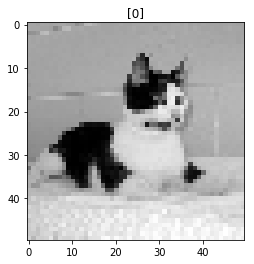

In [14]:
i = 4

plt.imshow(X_train[i].reshape(dim_resize), cmap='gray')
plt.title(y_train[i])
plt.show()



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.1765, random_state=0)

## First Model

In [47]:
#MODEL FOR (50,50) 74% Note: sigmoid fully connected last layer. Softmax was not working!?

model = Sequential()


model.add(Conv2D(10, kernel_size=(6,6), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(20, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(30, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(20, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 45, 45, 10)        370       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 22, 22, 10)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 22, 22, 10)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 20, 20, 20)        1820      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 10, 10, 20)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 10, 10, 20)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 30)          2430      
__________

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
first_model_output = model.fit(X_train, y_train, epochs=40,  validation_data=(X_validate, y_validate))
first_model = model

Train on 16282 samples, validate on 3490 samples
Epoch 1/40
16282/16282 [==============================] - 40s 2ms/step - loss: 0.6848 - acc: 0.5503 - val_loss: 0.6917 - val_acc: 0.5186
Epoch 2/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.6551 - acc: 0.6155 - val_loss: 0.6362 - val_acc: 0.6527
Epoch 3/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.6280 - acc: 0.6457 - val_loss: 0.6152 - val_acc: 0.6845
Epoch 4/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.6039 - acc: 0.6735 - val_loss: 0.5925 - val_acc: 0.7009
Epoch 5/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.5890 - acc: 0.6857 - val_loss: 0.5854 - val_acc: 0.6983
Epoch 6/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.5763 - acc: 0.6997 - val_loss: 0.5690 - val_acc: 0.7049
Epoch 7/40
16282/16282 [==============================] - 37s 2ms/step - loss: 0.5637 - acc: 0.7094 - val_loss: 0.5773 - val_acc:

In [51]:
metrics = pd.DataFrame(first_model_output.history)

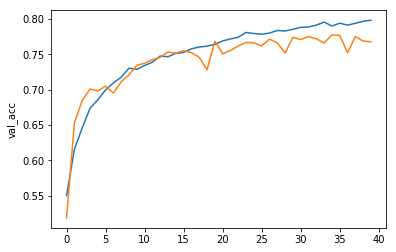

In [52]:
sns.lineplot(data=metrics, x = metrics.index, y='acc')
sns.lineplot(data=metrics, x = metrics.index, y='val_acc')

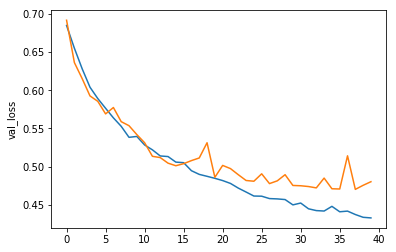

In [53]:
sns.lineplot(data=metrics, x = metrics.index, y='loss')
sns.lineplot(data=metrics, x = metrics.index, y='val_loss')

## Second Model

In [54]:
# (50,50) model: 83% accuracy after ~30 epochs. Maybe higher...(probably not)
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='softmax'))

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 49, 49, 32)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 128)       32896     
__________

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
second_model_output = model.fit(X_train, y_train, epochs=40,  validation_data=(X_validate, y_validate))
second_model = model

Train on 16282 samples, validate on 3490 samples
Epoch 1/40
16282/16282 [==============================] - 62s 4ms/step - loss: 0.6630 - acc: 0.6023 - val_loss: 0.6141 - val_acc: 0.6607
Epoch 2/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.5900 - acc: 0.6866 - val_loss: 0.5462 - val_acc: 0.7223
Epoch 3/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.5383 - acc: 0.7259 - val_loss: 0.5216 - val_acc: 0.7350
Epoch 4/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.5080 - acc: 0.7518 - val_loss: 0.4948 - val_acc: 0.7633
Epoch 5/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.4822 - acc: 0.7659 - val_loss: 0.4836 - val_acc: 0.7699
Epoch 6/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.4606 - acc: 0.7787 - val_loss: 0.4595 - val_acc: 0.7834
Epoch 7/40
16282/16282 [==============================] - 61s 4ms/step - loss: 0.4427 - acc: 0.7935 - val_loss: 0.4449 - val_acc:

In [58]:
metrics = pd.DataFrame(second_model_output.history)

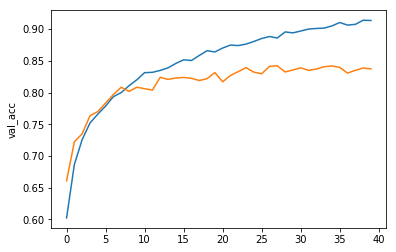

In [59]:
sns.lineplot(data=metrics, x = metrics.index, y='acc')
sns.lineplot(data=metrics, x = metrics.index, y='val_acc')

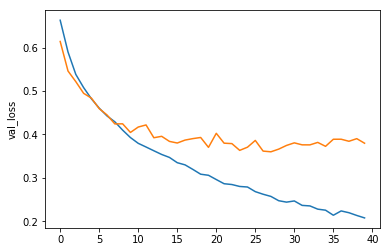

In [60]:
sns.lineplot(data=metrics, x = metrics.index, y='loss')
sns.lineplot(data=metrics, x = metrics.index, y='val_loss')